In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading the Data and Preprocessing for ML

In [36]:
#Load the graph variables and Demographic variables
Dosenbach_path = os.getcwd() + '\\Dosenbach'
AAL_path = os.getcwd() + '\\AAL'

Dosenbach_df = pd.read_excel(Dosenbach_path + '\\globalVariables.xls',sheetname='0.2')
AAL_df = pd.read_excel(AAL_path + '\\globalVariables.xls',sheetname='0.2')

Vars = pd.read_csv('Variables_Prepd.csv')

In [41]:
def name_parser(s):
    '''
    pass
    '''
    b = s.replace('CorrMatrix_','')
    b = b[:b.find('_rois')]
    return b

def add_meta_data(df):
    '''
    pass
    '''
    temp_df = df.reset_index()
    temp_df['FILE_ID'] = temp_df['index'].apply(name_parser)
    temp_df['SITE_ID'] = temp_df['FILE_ID'].apply(lambda s: ''.join(s.split('_')[:-1]).upper())
    temp_df['subject'] = temp_df['FILE_ID'].apply(lambda s: s[s.find('_00')+3:])
    temp_df.set_index('index',inplace=True)
    return temp_df
    

In [42]:
#Parse the index to add the meta data
Dosenbach_df = add_meta_data(Dosenbach_df)
AAL_df = add_meta_data(AAL_df)

In [43]:
Dosenbach_df.SITE_ID.unique()

array(['YALE', 'USM', 'UM2', 'UM1', 'UCLA2', 'UCLA1', 'TRINITY',
       'STANFORD', 'SDSU', 'SBL', 'PITT', 'OLIN', 'OHSU', 'NYU',
       'MAXMUND', 'MAXMUNC', 'MAXMUNB', 'MAXMUNA', 'LEUVEN2', 'LEUVEN1',
       'KKI', 'CMUB', 'CMUA', 'CALTECH'], dtype=object)

In [45]:
#Add usefull demographic data to the dataframes
Dosenbach_df = pd.merge(Dosenbach_df,Vars[['FILE_ID','DX_GROUP','SEX', 'AGE_AT_SCAN']],on='FILE_ID')
AAL_df = pd.merge(AAL_df,Vars[['FILE_ID','DX_GROUP','SEX', 'AGE_AT_SCAN']],on='FILE_ID')

In [46]:
#Get rid of subjects with missing data in their correlation matrix
bad_aal = ['CMU_b_0050651', 'CMU_b_0050657', 'CMU_b_0050669', 'Caltech_0051457', 'Caltech_0051458', 
'Caltech_0051459', 'Caltech_0051460', 'Caltech_0051464', 'Caltech_0051466', 'Caltech_0051467', 
'Caltech_0051468', 'Caltech_0051469', 'Caltech_0051471', 'Caltech_0051473', 'Caltech_0051478', 'Caltech_0051483', 
'Caltech_0051485', 'Caltech_0051487', 'Caltech_0051489', 'Caltech_0051490', 'KKI_0050790', 'Leuven_2_0050727', 
'MaxMun_a_0051364', 'MaxMun_c_0051336', 'NYU_0051020', 'NYU_0051033', 'NYU_0051036', 'NYU_0051100', 'NYU_0051118', 
'Pitt_0050004', 'Pitt_0050007', 'Pitt_0050011', 'Pitt_0050016', 'Pitt_0050024', 'Pitt_0050032', 'Pitt_0050035', 
'Pitt_0050037', 'Pitt_0050041', 'Pitt_0050045', 'Pitt_0050050', 'Pitt_0050052', 'Pitt_0050060', 'SBL_0051558', 
'SBL_0051560', 'SBL_0051562', 'SBL_0051564', 'SBL_0051565', 'SBL_0051566', 'SBL_0051567', 'SBL_0051571', 
'SBL_0051572', 'SBL_0051573', 'SBL_0051577', 'SBL_0051578', 'SBL_0051579', 'SBL_0051580', 'SBL_0051582', 
'SBL_0051583', 'SBL_0051584', 'SBL_0051585', 'SDSU_0050182', 'SDSU_0050184', 'SDSU_0050195', 'SDSU_0050209', 
'SDSU_0050210', 'SDSU_0050216', 'Trinity_0050259']

bad_dosenbach = ['CMU_b_0050651', 'CMU_b_0050669', 'Caltech_0051456', 'Caltech_0051457', 'Caltech_0051458', 
    'Caltech_0051459', 'Caltech_0051460', 'Caltech_0051462', 'Caltech_0051464', 
    'Caltech_0051465', 'Caltech_0051466', 'Caltech_0051467', 'Caltech_0051468', 
    'Caltech_0051469', 'Caltech_0051470', 'Caltech_0051471', 'Caltech_0051472', 'Caltech_0051473', 
    'Caltech_0051474', 'Caltech_0051476', 'Caltech_0051478', 'Caltech_0051480', 'Caltech_0051481', 
    'Caltech_0051485', 'Caltech_0051487', 'Caltech_0051489', 'Caltech_0051490', 'Caltech_0051491', 
    'Caltech_0051492', 'Caltech_0051493', 'Leuven_1_0050685', 'Leuven_1_0050700', 'Leuven_1_0050701', 
    'Leuven_1_0050705', 'Leuven_1_0050706', 'Leuven_1_0050708', 'Leuven_2_0050727', 'Leuven_2_0050735', 
    'NYU_0051058', 'NYU_0051098', 'NYU_0051123', 'Pitt_0050007', 'Pitt_0050011', 'Pitt_0050016', 
    'Pitt_0050024', 'Pitt_0050035', 'Pitt_0050041', 'Pitt_0050045', 'Pitt_0050050', 'Pitt_0050052', 
    'Pitt_0050060', 'SBL_0051558', 'SBL_0051560', 'SBL_0051566', 'SBL_0051567', 'SBL_0051571', 'SBL_0051572', 
    'SBL_0051573', 'SBL_0051579', 'SBL_0051582', 'SBL_0051584', 'SDSU_0050189', 'SDSU_0050195', 'SDSU_0050198', 
    'SDSU_0050204', 'SDSU_0050209', 'SDSU_0050216', 'SDSU_0050217', 'Trinity_0050259', 'Yale_0050605']

Dosenbach_df = Dosenbach_df[~Dosenbach_df.FILE_ID.isin(bad_dosenbach)]
AAL_df = AAL_df[~AAL_df.FILE_ID.isin(bad_aal)]

In [51]:
Dosenbach_df.groupby(['SITE_ID','DX_GROUP','SEX'])['AGE_AT_SCAN'].describe().loc['UM1']

count       mean       std  min    25%    50%    75%   max
DX_GROUP SEX                                                            
1        1     28.0  13.528571  2.245301  9.2  12.30  13.60  15.25  18.6
         2      8.0  13.150000  3.095619  9.7  11.00  12.05  15.45  18.0
2        1     31.0  14.009677  3.284647  8.2  10.95  13.90  17.15  18.9
         2     15.0  14.720000  3.008369  9.5  13.30  14.30  17.20  19.2

In [6]:
#Only keep the male subject data in requested sites

In [49]:
def select_subjects(df, sites=None, sex=None, age_range=None, group=None):
    '''
    pass
    '''
    
    dictionary = d = {'m': 1, 'f': 2, 'ASD': 1, 'HC': 2} #dict for transforming the inputs to values found in the df
    #Fill the variables in such a way that it selects all subjects
    if sites == None: 
        sites = list(df.SITE_ID.unique())
    if sex == None:
        sex = ['m','f']
    if age_range == None:
        age_range = (0,150)
    if group == None:
        group = ['HC','ASD']
    
    #Actual code
    if isinstance(group, list) == False:
        group = group.split()
    sex = list(map(dictionary.get,sex))
    group = list(map(dictionary.get,group))
    
    return df[(df['SITE_ID'].isin(sites)) & 
              (df['SEX'].isin(sex)) & 
              (df['AGE_AT_SCAN'].between(age_range[0], age_range[1])) & 
              (df['DX_GROUP'].isin(group)) 
             ]

# Experiment 1
**Simple Cross Validation**

## Dosenbach

In [52]:
data = select_subjects(Dosenbach_df,sex='m',sites=['YALE','PITT','NYU','TRINITY','STANFORD','UCLA1','SDSU','UM1'])
X = data.drop(['DX_GROUP','SEX','AGE_AT_SCAN','FILE_ID','SITE_ID','subject'],axis=1)
y = data['DX_GROUP']

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [54]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10,random_state=101)

In [60]:
from sklearn.model_selection import cross_val_score,cross_validate,permutation_test_score,validation_curve
from sklearn.svm import SVC,LinearSVC
svc_rbf = SVC(random_state = 101,C=10,gamma='auto')
svc_lin = LinearSVC(random_state=101)
print(f"RBF kernel score is {sum(cross_val_score(svc_rbf,X,y,cv=cv))/10}")
print(f"Linear kernel score is {sum(cross_val_score(svc_lin,X,y,cv=cv))/10}")

RBF kernel score is 0.3841025641025641
Linear kernel score is 0.39692307692307693


In [61]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.1, 1, 10], 'gamma':['auto',0.001, 0.01, 0.1]}
clf = GridSearchCV(SVC(), parameters,cv=cv, verbose=0,n_jobs=-1)
clf.fit(X,y)
clf.best_params_

{'C': 10, 'gamma': 'auto'}

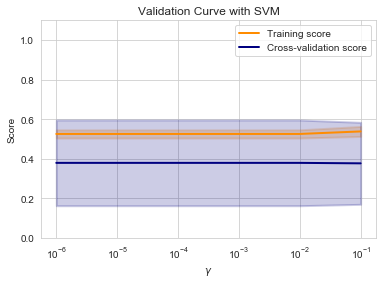

In [62]:
param_range = np.logspace(-6, -1, 6)
train_scores, test_scores = validation_curve(svc_rbf,X,y,cv=cv,param_name='gamma',param_range=param_range)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

sns.set_style('whitegrid')
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [63]:
score, permutation_scores, pvalue = permutation_test_score(svc_rbf,X,y,cv=cv,n_permutations=100,n_jobs=-1,random_state=101)
print(f"The p_value for the accuracy is {pvalue}")

The p_value for the accuracy is 1.0


## AAL

In [78]:
data = select_subjects(AAL_df,sex='m',sites=['YALE','PITT','NYU','TRINITY','STANFORD','UCLA1','SDSU','UM1'])
X = data.drop(['DX_GROUP','SEX','AGE_AT_SCAN','FILE_ID','SITE_ID','subject'],axis=1)
y = data['DX_GROUP']

In [79]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10,random_state=101)

In [80]:
from sklearn.model_selection import cross_val_score,cross_validate,permutation_test_score,validation_curve
from sklearn.svm import SVC,LinearSVC
svc_rbf = SVC(random_state = 101,C=10,gamma='auto')
svc_lin = LinearSVC(random_state=101)
print(f"RBF kernel score is {sum(cross_val_score(svc_rbf,X,y,cv=cv))/10}")
print(f"Linear kernel score is {sum(cross_val_score(svc_lin,X,y,cv=cv))/10}")

RBF kernel score is 0.4282051282051282
Linear kernel score is 0.46647435897435896


In [81]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.1, 1, 10], 'gamma':['auto',0.001, 0.01, 0.1]}
clf = GridSearchCV(SVC(), parameters,cv=cv, verbose=0,n_jobs=-1)
clf.fit(X,y)
clf.best_params_

{'C': 10, 'gamma': 'auto'}

In [82]:
cross_val_score(svc_rbf,X,y,cv=cv)

array([0.        , 0.43589744, 0.15384615, 0.48717949, 0.51282051,
       0.46153846, 0.35897436, 0.71794872, 0.58974359, 0.56410256])

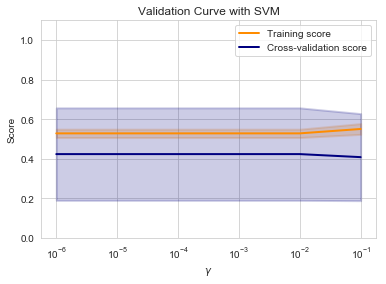

In [83]:
param_range = np.logspace(-6, -1, 6)
train_scores, test_scores = validation_curve(svc_rbf,X,y,cv=cv,param_name='gamma',param_range=param_range)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

sns.set_style('whitegrid')
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [221]:
score, permutation_scores, pvalue = permutation_test_score(svc_rbf,X,y,cv=cv,n_permutations=100,n_jobs=-1,random_state=101)
print(f"The p_value for the accuracy is {pvalue}")

The p_value for the accuracy is 1.0


# Experiment 2
Leave one group out

## Dosenbach

In [106]:
data = select_subjects(Dosenbach_df,sex='m',sites=['YALE','PITT','NYU','TRINITY','STANFORD','UCLA1','SDSU','UM1'])
X = data.drop(['DX_GROUP','SEX','AGE_AT_SCAN','FILE_ID','SITE_ID','subject'],axis=1)
y = data['DX_GROUP']
groups = data.groupby('SITE_ID')

In [107]:
#data[data.SITE_ID == 'NYU'].sample(frac=0.5,random_state=7).groupby('DX_GROUP')['AGE_AT_SCAN'].describe()
#Split the NYU data into two groups
data.loc[data[data.SITE_ID == 'NYU'].sample(frac=0.5,random_state=7).index,'SITE_ID'] = 'NYU2'

C:\Users\Mehdy\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [108]:
#split the data into groups
from sklearn.model_selection import LeaveOneGroupOut
groups = data.SITE_ID
cv = LeaveOneGroupOut()
cv.get_n_splits(X,y,groups)
gen = cv.split(X,y,groups)

In [109]:
from sklearn.model_selection import cross_val_score,cross_validate,permutation_test_score,validation_curve
from sklearn.svm import SVC,LinearSVC
svc_rbf = SVC(random_state = 101,C=1,gamma='auto')
svc_lin = LinearSVC(random_state=101)
gen = cv.split(X,y,groups)
print(f"RBF kernel score is {sum(cross_val_score(svc_rbf,X,y,cv=gen))/len(data.SITE_ID.unique())}")
gen = cv.split(X,y,groups)
print(f"Linear kernel score is {sum(cross_val_score(svc_lin,X,y,cv=gen))/len(data.SITE_ID.unique())}")

RBF kernel score is 0.518076374640799
Linear kernel score is 0.5303814287571946


In [93]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.1, 1, 10], 'gamma':['auto',0.001, 0.01, 0.1]}
clf = GridSearchCV(SVC(), parameters,cv=cv.split(X,y,groups), verbose=0,n_jobs=-1)
clf.fit(X,y)
clf.best_params_

{'C': 0.1, 'gamma': 'auto'}

In [110]:
cross_val_score(svc_rbf,X,y,cv=cv.split(X,y,groups))

array([0.53731343, 0.50746269, 0.5       , 0.5       , 0.53571429,
       0.51162791, 0.46938776, 0.52542373, 0.57575758])

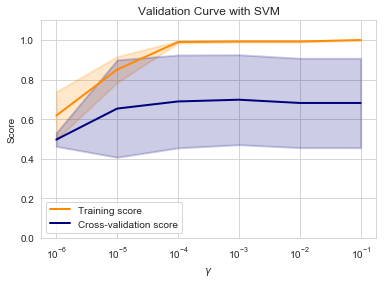

In [184]:
param_range = np.logspace(-6, -1, 6)
train_scores, test_scores = validation_curve(svc_rbf,X,y,cv=cv.split(X,y,groups),param_name='gamma',param_range=param_range)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

sns.set_style('whitegrid')
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [185]:
score, permutation_scores, pvalue = permutation_test_score(svc_rbf,X,y,cv=cv.split(X,y,groups),n_permutations=100,n_jobs=-1,random_state=101)
print(f"The p_value for the accuracy is {pvalue}")

The p_value for the accuracy is 0.009900990099009901


## AAL

In [111]:
data = select_subjects(AAL_df,sex='m',sites=['YALE','PITT','NYU','TRINITY','STANFORD','UCLA1','SDSU','UM1'])
X = data.drop(['DX_GROUP','SEX','AGE_AT_SCAN','FILE_ID','SITE_ID','subject'],axis=1)
y = data['DX_GROUP']
groups = data.groupby('SITE_ID')

In [112]:
#data[data.SITE_ID == 'NYU'].sample(frac=0.5,random_state=7).groupby('DX_GROUP')['AGE_AT_SCAN'].describe()
#Split the NYU data into two groups
data.loc[data[data.SITE_ID == 'NYU'].sample(frac=0.5,random_state=7).index,'SITE_ID'] = 'NYU2'

C:\Users\Mehdy\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [113]:
#split the data into groups
from sklearn.model_selection import LeaveOneGroupOut
groups = data.SITE_ID
cv = LeaveOneGroupOut()
cv.get_n_splits(X,y,groups)
gen = cv.split(X,y,groups)

In [114]:
from sklearn.model_selection import cross_val_score,cross_validate,permutation_test_score,validation_curve
from sklearn.svm import SVC,LinearSVC
svc_rbf = SVC(random_state = 101,C=1,gamma='auto')
svc_lin = LinearSVC(random_state=101)
gen = cv.split(X,y,groups)
print(f"RBF kernel score is {sum(cross_val_score(svc_rbf,X,y,cv=gen))/len(data.SITE_ID.unique())}")
gen = cv.split(X,y,groups)
print(f"Linear kernel score is {sum(cross_val_score(svc_lin,X,y,cv=gen))/len(data.SITE_ID.unique())}")

RBF kernel score is 0.5236679820058918
Linear kernel score is 0.54464738148577


In [103]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.1, 1, 10], 'gamma':['auto',0.001, 0.01, 0.1]}
clf = GridSearchCV(SVC(), parameters,cv=cv.split(X,y,groups), verbose=0,n_jobs=-1)
clf.fit(X,y)
clf.best_params_

{'C': 10, 'gamma': 'auto'}

In [115]:
cross_val_score(svc_rbf,X,y,cv=cv.split(X,y,groups))

array([0.54545455, 0.51515152, 0.48      , 0.57142857, 0.53571429,
       0.51162791, 0.46938776, 0.52542373, 0.55882353])

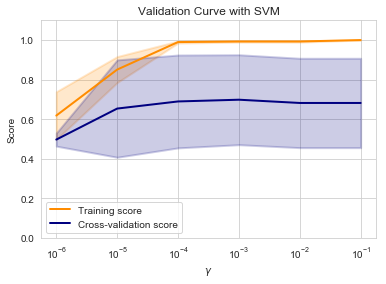

In [192]:
param_range = np.logspace(-6, -1, 6)
train_scores, test_scores = validation_curve(svc_rbf,X,y,cv=cv.split(X,y,groups),param_name='gamma',param_range=param_range)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

sns.set_style('whitegrid')
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [116]:
score, permutation_scores, pvalue = permutation_test_score(svc_rbf,X,y,cv=cv.split(X,y,groups),n_permutations=100,n_jobs=-1,random_state=101)
print(f"The p_value for the accuracy is {pvalue}")

The p_value for the accuracy is 0.4752475247524752


** Some testing for experiment 2 **

In [142]:
groups.unique()

array(['YALE', 'TRINITY', 'PITT', 'NYU', 'NYU2', 'CALTECH'], dtype=object)

In [156]:
cross_val_score(svc_rbf,X,y,cv=cv.split(X,y,groups))

array([0.51724138, 1.        , 1.        , 0.52631579, 0.70454545,
       0.44117647])

In [150]:
gen = cv.split(X,y,groups)
for train,test in gen:
    print(f"train is {len(train)}")
    print(f"test is {len(test)}")

train is 252
test is 29
train is 213
test is 68
train is 213
test is 68
train is 243
test is 38
train is 237
test is 44
train is 247
test is 34


In [124]:
svc_lin.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=101, tol=0.0001,
     verbose=0)

In [129]:
X

,assortativity_bin2,clusterMean_bu,charpath_B,efficiency_bin,small_world_propensity_bin,transitivity_bu
193,0.121377,0.446957,1.914834,0.578086,0.623729,0.447491
194,0.253153,0.513745,2.009215,0.562231,0.693404,0.511623
195,0.088176,0.505561,1.994501,0.564730,0.687922,0.505184
196,0.062218,0.498331,1.971165,0.568616,0.683774,0.497588
197,0.199868,0.412256,1.888971,0.582434,0.577133,0.418274
198,0.140287,0.436441,1.912753,0.578436,0.610080,0.429214
199,0.203694,0.464621,1.946344,0.572789,0.641795,0.459464
200,0.294276,0.515162,2.017687,0.560795,0.694640,0.531582
201,0.150763,0.479456,1.959869,0.570515,0.661557,0.476611
202,0.084761,0.439222,1.914685,0.578111,0.611979,0.438569


In [144]:
temp = [34,35,36,37,38 ,39, 40, 41, 42, 43, 44, 45, 46 ,47 ,48 ,49 ,50 ,51, 52, 53 ,54, 55, 56, 57,
 58, 59 ,60, 61 ,62 ,63 ,64 ,65 ,66 ,67 ,68 ,69 ,70 ,71 ,72 ,73 ,74 ,75 ,76 ,77]

In [147]:
data.iloc[temp]

,assortativity_bin2,clusterMean_bu,charpath_B,efficiency_bin,small_world_propensity_bin,transitivity_bu,FILE_ID,SITE_ID,subject,DX_GROUP,SEX,AGE_AT_SCAN
297,0.112213,0.443068,1.899772,0.581392,0.615689,0.443119,Trinity_0051142,TRINITY,51142,2,1,14.91
298,0.168145,0.457871,1.915898,0.578688,0.632246,0.467371,Trinity_0051141,TRINITY,51141,2,1,15.91
299,0.164247,0.470395,1.920373,0.577937,0.646747,0.465476,Trinity_0051140,TRINITY,51140,2,1,15.75
300,0.245260,0.456925,1.922302,0.577614,0.631941,0.469560,Trinity_0051139,TRINITY,51139,2,1,19.50
301,0.092238,0.433366,1.871533,0.586128,0.603637,0.434033,Trinity_0051138,TRINITY,51138,2,1,12.66
302,0.150141,0.384050,1.844605,0.590644,0.537870,0.380291,Trinity_0051137,TRINITY,51137,2,1,13.25
303,0.313158,0.435148,1.880560,0.584614,0.605691,0.452370,Trinity_0051135,TRINITY,51135,2,1,13.75
304,0.249119,0.464660,1.921685,0.577717,0.639570,0.469264,Trinity_0051134,TRINITY,51134,2,1,16.83
305,0.130652,0.412539,1.865206,0.587189,0.575399,0.411950,Trinity_0051133,TRINITY,51133,2,1,12.04
306,0.205479,0.425346,1.891902,0.582712,0.592089,0.427366,Trinity_0051132,TRINITY,51132,2,1,24.83


In [148]:
data[data['SITE_ID']=='TRINITY']

,assortativity_bin2,clusterMean_bu,charpath_B,efficiency_bin,small_world_propensity_bin,transitivity_bu,FILE_ID,SITE_ID,subject,DX_GROUP,SEX,AGE_AT_SCAN
297,0.112213,0.443068,1.899772,0.581392,0.615689,0.443119,Trinity_0051142,TRINITY,51142,2,1,14.91
298,0.168145,0.457871,1.915898,0.578688,0.632246,0.467371,Trinity_0051141,TRINITY,51141,2,1,15.91
299,0.164247,0.470395,1.920373,0.577937,0.646747,0.465476,Trinity_0051140,TRINITY,51140,2,1,15.75
300,0.245260,0.456925,1.922302,0.577614,0.631941,0.469560,Trinity_0051139,TRINITY,51139,2,1,19.50
301,0.092238,0.433366,1.871533,0.586128,0.603637,0.434033,Trinity_0051138,TRINITY,51138,2,1,12.66
302,0.150141,0.384050,1.844605,0.590644,0.537870,0.380291,Trinity_0051137,TRINITY,51137,2,1,13.25
303,0.313158,0.435148,1.880560,0.584614,0.605691,0.452370,Trinity_0051135,TRINITY,51135,2,1,13.75
304,0.249119,0.464660,1.921685,0.577717,0.639570,0.469264,Trinity_0051134,TRINITY,51134,2,1,16.83
305,0.130652,0.412539,1.865206,0.587189,0.575399,0.411950,Trinity_0051133,TRINITY,51133,2,1,12.04
306,0.205479,0.425346,1.891902,0.582712,0.592089,0.427366,Trinity_0051132,TRINITY,51132,2,1,24.83


In [194]:
data[data['SITE_ID'].isin(['NYU','NYU2'])]

,assortativity_bin2,clusterMean_bu,charpath_B,efficiency_bin,small_world_propensity_bin,transitivity_bu,FILE_ID,SITE_ID,subject,DX_GROUP,SEX,AGE_AT_SCAN
193,0.121377,0.446957,1.914834,0.578086,0.623729,0.447491,NYU_0050964,NYU,50964,1,1,12.750
194,0.253153,0.513745,2.009215,0.562231,0.693404,0.511623,NYU_0050965,NYU,50965,1,1,9.250
195,0.088176,0.505561,1.994501,0.564730,0.687922,0.505184,NYU_0050966,NYU2,50966,1,1,15.140
196,0.062218,0.498331,1.971165,0.568616,0.683774,0.497588,NYU_0050967,NYU2,50967,1,1,9.740
197,0.199868,0.412256,1.888971,0.582434,0.577133,0.418274,NYU_0050968,NYU,50968,1,1,9.950
198,0.140287,0.436441,1.912753,0.578436,0.610080,0.429214,NYU_0050969,NYU2,50969,1,1,7.610
199,0.203694,0.464621,1.946344,0.572789,0.641795,0.459464,NYU_0050970,NYU,50970,1,1,8.900
200,0.294276,0.515162,2.017687,0.560795,0.694640,0.531582,NYU_0050972,NYU,50972,1,1,13.950
201,0.150763,0.479456,1.959869,0.570515,0.661557,0.476611,NYU_0050973,NYU,50973,1,1,17.880
202,0.084761,0.439222,1.914685,0.578111,0.611979,0.438569,NYU_0050974,NYU,50974,1,1,11.560


In [117]:
X

,assortativity_bin2,clusterMean_bu,charpath_B,efficiency_bin,small_world_propensity_bin,transitivity_bu
193,0.121377,0.446957,1.914834,0.578086,0.623729,0.447491
194,0.253153,0.513745,2.009215,0.562231,0.693404,0.511623
195,0.088176,0.505561,1.994501,0.564730,0.687922,0.505184
196,0.062218,0.498331,1.971165,0.568616,0.683774,0.497588
197,0.199868,0.412256,1.888971,0.582434,0.577133,0.418274
198,0.140287,0.436441,1.912753,0.578436,0.610080,0.429214
199,0.203694,0.464621,1.946344,0.572789,0.641795,0.459464
200,0.294276,0.515162,2.017687,0.560795,0.694640,0.531582
201,0.150763,0.479456,1.959869,0.570515,0.661557,0.476611
202,0.084761,0.439222,1.914685,0.578111,0.611979,0.438569


## Experiment 3
** Do we achieve 100% because the model has seen subjects from the same site before? Only NYU **